In [208]:
!pip install gensim
!pip install nltk
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=eea0eccdd328eb4830b5e2e9234c7087d4bee5e4cf06f308cfa0b887b5fb09e4
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
#Preprocessing
  #Read
  #tokanize
  #in batch

#Training

In [ ]:
import nltk
import gensim
import os
import string

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Data Loading and Preprocessing**

*   Read each file
*   split into sentence
*   word tokanize
*   Remove stopword




In [ ]:

def read_scripts(loc) :

  """Read file from loc and store it in list"""


  scripts = []
  stop_words = set(stopwords.words('english'))
  for ses, dir in enumerate(os.listdir(loc),1) :
    filepath = os.path.join(loc, dir)
    with open(filepath, encoding="cp1252") as f :

      corpus  = f.read()
      raw_sentence = nltk.sent_tokenize(corpus)
      for sent in raw_sentence :
        scripts.append( [ word for word in simple_preprocess(sent)  if word not in stop_words ])
  return scripts

In [ ]:
scripts = read_scripts("/content/got")

In [ ]:
scripts[:20]

[['storm', 'swords', 'book', 'three', 'song', 'ice', 'fire', 'george'],
 ['martin',
  'note',
  'chronology',
  'song',
  'ice',
  'fire',
  'told',
  'eyes',
  'characters',
  'sometimes',
  'hundreds',
  'even',
  'thousands',
  'miles',
  'apart',
  'one',
  'another'],
 ['chapters',
  'cover',
  'day',
  'hour',
  'others',
  'might',
  'span',
  'fortnight',
  'month',
  'half',
  'year'],
 ['structure',
  'narrative',
  'cannot',
  'strictly',
  'sequential',
  'sometimes',
  'important',
  'things',
  'happening',
  'simultaneously',
  'thousand',
  'leagues',
  'apart'],
 ['case',
  'volume',
  'hand',
  'reader',
  'realize',
  'opening',
  'chapters',
  'storm',
  'swords',
  'follow',
  'closing',
  'chapters',
  'clash',
  'kings',
  'much',
  'overlap'],
 ['open',
  'look',
  'things',
  'happening',
  'fist',
  'first',
  'men',
  'riverrun',
  'harrenhal',
  'trident',
  'thebattleof',
  'blackwater',
  'fought',
  'king',
  'landing',
  'aftermath',
  'george',
  'marti

**Training**

In [200]:
model = gensim.models.Word2Vec(sentences=scripts, window = 7, vector_size = 100,min_count=2
                              )

In [201]:
model.build_vocab(scripts)

In [203]:
model.train(scripts, total_examples=model.corpus_count,epochs=model.epochs)

(4396495, 4579390)

In [204]:
model.wv.most_similar('khaleesi')

[('ko', 0.6995387077331543),
 ('handmaids', 0.6980688571929932),
 ('jhogo', 0.693885862827301),
 ('missandei', 0.6761808395385742),
 ('magnificence', 0.6761386394500732),
 ('dothraki', 0.6752840876579285),
 ('irri', 0.6726891994476318),
 ('stormborn', 0.671914279460907),
 ('maegi', 0.6713018417358398),
 ('bloodrider', 0.6708157062530518)]

In [205]:
model.wv.most_similar('jon')

[('ranger', 0.5438172221183777),
 ('ygritte', 0.5417969822883606),
 ('pyp', 0.5394297242164612),
 ('stonesnake', 0.5349518060684204),
 ('grenn', 0.528778612613678),
 ('larence', 0.5205429196357727),
 ('styr', 0.5149397850036621),
 ('bran', 0.5127171874046326),
 ('tormund', 0.5033218860626221),
 ('theon', 0.48665669560432434)]

In [206]:
model.wv.most_similar('drogo')

[('khal', 0.876133382320404),
 ('jhaqo', 0.7807597517967224),
 ('pono', 0.7441257834434509),
 ('rhaego', 0.7375668883323669),
 ('bloodriders', 0.7329227328300476),
 ('sunand', 0.72318434715271),
 ('rhaggat', 0.7051793336868286),
 ('fogo', 0.6942223310470581),
 ('khalasar', 0.6834060549736023),
 ('womb', 0.6514118313789368)]

In [207]:
model.wv.most_similar('qarth')

[('yi', 0.8095903992652893),
 ('pentos', 0.7948205471038818),
 ('lys', 0.7769486308097839),
 ('qartheen', 0.7585887908935547),
 ('ti', 0.7585825324058533),
 ('shadowbinder', 0.747092068195343),
 ('xhoan', 0.7435377240180969),
 ('palace', 0.7323846220970154),
 ('volantis', 0.7279112935066223),
 ('xaro', 0.7189606428146362)]

In [ ]:
word2vec_embeddings = model.wv.get_normed_vectors()

In [213]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [214]:
num_samples = 200  # Set this to 100 or 200 as needed
indices = np.random.choice(word2vec_embeddings.shape[0], num_samples, replace=False)
subset_embeddings = word2vec_embeddings[indices]

tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(subset_embeddings)

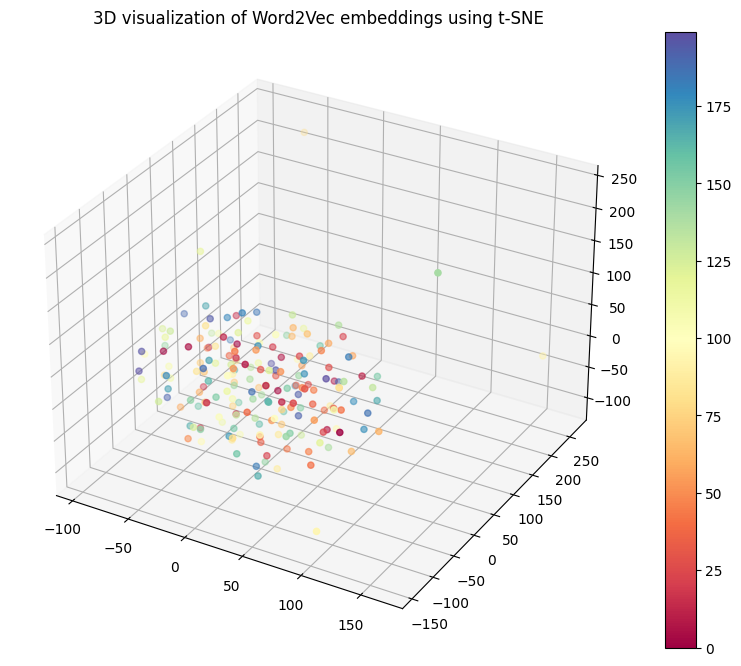

In [216]:
# Plot the 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=np.arange(num_samples), cmap='Spectral', marker='o')

plt.colorbar(sc)
plt.title('3D visualization of Word2Vec embeddings using t-SNE')
plt.show()

In [211]:
umap.

<module 'umap' from '/usr/local/lib/python3.10/dist-packages/umap/__init__.py'>